## Dependencies

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

## Setup and Run Request
We are going to use NOAA Climate Data. We examine the cities of Monroe, WA and Stehekin, WA. To compare between years, we examine both the 2024 and 2025 data. Then, we plot the averages of each month. 

## Stehekin NOAA data

In [12]:
#Define the API URL and token header
headers = {'token' : 'TvAdxJblLeoezyJUbgSJRikNMntqSusm'}
url = 'https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND:USC00458059&&units=metric&datatype=PRCP&limit=1000&startdate=2025-12-01&enddate=2025-12-31'
# Download the json data
response = requests.get(url, headers=headers)
response.raise_for_status()  # Raise an error if the request failed
StehekinWeatherData = response.json() #get json file

url = 'https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND:USC00458059&&units=metric&datatype=PRCP&limit=1000&startdate=2024-12-01&enddate=2024-12-31'
# Download the json data
response = requests.get(url, headers=headers)
response.raise_for_status()  # Raise an error if the request failed
StehekinWeatherData2024 = response.json() #get json file

HTTPError: 503 Server Error: Service Unavailable for url: https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND:USC00458059&&units=metric&datatype=PRCP&limit=1000&startdate=2025-12-01&enddate=2025-12-31

In [ ]:
# Check data imported correctly
StehekinWeatherData

In [ ]:
# Convert json to pd dataframe
SteDf = pd.DataFrame(StehekinWeatherData["results"])

# Collect only precipitation data
StePrcpDf = SteDf[SteDf["datatype"]=="PRCP"] 

# Convert dates to nice format
StePrcpDf["date"] = pd.to_datetime(StePrcpDf["date"])

#Check dataframe for correctness
StePrcpDf

Ste24Df = pd.DataFrame(StehekinWeatherData2024["results"])
Ste24PrcpDf = Ste24Df[Ste24Df["datatype"] == "PRCP"]
Ste24PrcpDf["date"] = pd.to_datetime(Ste24PrcpDf["date"])


## USGS stream data

In [7]:
# download daily river discharge data
url = "https://waterservices.usgs.gov/nwis/dv/?format=json&sites=USGS:12451000&startDT=2025-12-01&endDT=2025-12-31&parameterCd=00060"


# downloading data
response = requests.get(url)
response.raise_for_status()
USGSstreamdata = response.json()

In [8]:
# check data uploaded correctly
USGSstreamdata

{'name': 'ns1:timeSeriesResponseType',
 'declaredType': 'org.cuahsi.waterml.TimeSeriesResponseType',
 'scope': 'javax.xml.bind.JAXBElement$GlobalScope',
 'value': {'queryInfo': {'queryURL': 'http://waterservices.usgs.gov/nwis/dv/format=json&sites=USGS:12451000&startDT=2025-12-01&endDT=2025-12-31&parameterCd=00060',
   'criteria': {'locationParam': '[USGS:12451000]',
    'variableParam': '[00060]',
    'timeParam': {'beginDateTime': '2025-12-01T00:00:00.000',
     'endDateTime': '2025-12-31T00:00:00.000'},
    'parameter': []},
   'note': [{'value': '[USGS:12451000]', 'title': 'filter:sites'},
    {'value': '[mode=RANGE, modifiedSince=null] interval={INTERVAL[2025-12-01T00:00:00.000-05:00/2025-12-31T00:00:00.000-05:00]}',
     'title': 'filter:timeRange'},
    {'value': 'methodIds=[ALL]', 'title': 'filter:methodId'},
    {'value': '2026-01-16T18:13:32.086Z', 'title': 'requestDT'},
    {'value': '10cfa650-f307-11f0-9d01-2cea7f58f5ca', 'title': 'requestId'},
    {'value': 'Provisional dat

In [25]:
# Convert json to pd dataframe
USGSDf = pd.DataFrame(USGSstreamdata['value']['timeSeries'][0]["values"][0]["value"])

USGSDf["dateTime"] = pd.to_datetime(USGSDf["dateTime"])
USGSDf['value'] = USGSDf["value"].astype(float)
USGSDf

,value,qualifiers,dateTime
0,705.0,[P],2025-12-01
1,679.0,[P],2025-12-02
2,646.0,[P],2025-12-03
3,622.0,[P],2025-12-04
4,636.0,[P],2025-12-05
5,992.0,[P],2025-12-06
6,969.0,[P],2025-12-07
7,1510.0,[P],2025-12-08
8,3440.0,[P],2025-12-09
9,6580.0,[P],2025-12-10


## Examine and Visualize Data 

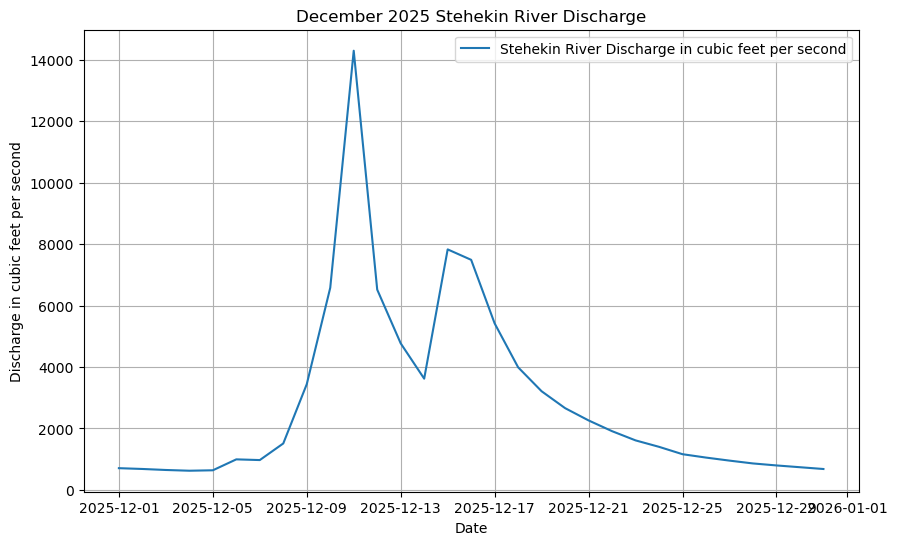

In [27]:
import numpy as np
plt.figure(figsize=(10,6))
plt.plot(USGSDf['dateTime'], USGSDf['value'], label = "Stehekin River Discharge in cubic feet per second")
plt.legend()
plt.grid()
plt.xlabel("Date")
plt.ylabel("Discharge in cubic feet per second")
plt.title("December 2025 Stehekin River Discharge")
plt.show()



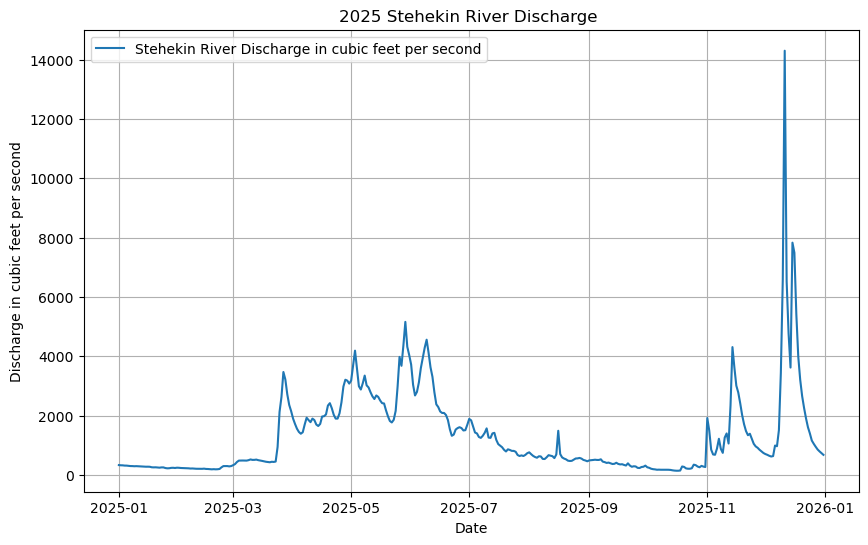

In [30]:
# More USGS Stream Data from the whole year
# download daily river discharge data
url = "https://waterservices.usgs.gov/nwis/dv/?format=json&sites=USGS:12451000&startDT=2025-01-01&endDT=2025-12-31&parameterCd=00060"


# downloading data
response = requests.get(url)
response.raise_for_status()
USGSstreamdataYr = response.json()
USGSstreamdataYr

# Convert json to pd dataframe
USGSDfYr = pd.DataFrame(USGSstreamdataYr['value']['timeSeries'][0]["values"][0]["value"])

USGSDfYr["dateTime"] = pd.to_datetime(USGSDfYr["dateTime"])
USGSDfYr['value'] = USGSDfYr["value"].astype(float)
USGSDfYr

plt.figure(figsize=(10,6))
plt.plot(USGSDfYr["dateTime"], USGSDfYr["value"], label = "Stehekin River Discharge in cubic feet per second")
plt.grid()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Discharge in cubic feet per second")
plt.title("2025 Stehekin River Discharge ")
plt.show()

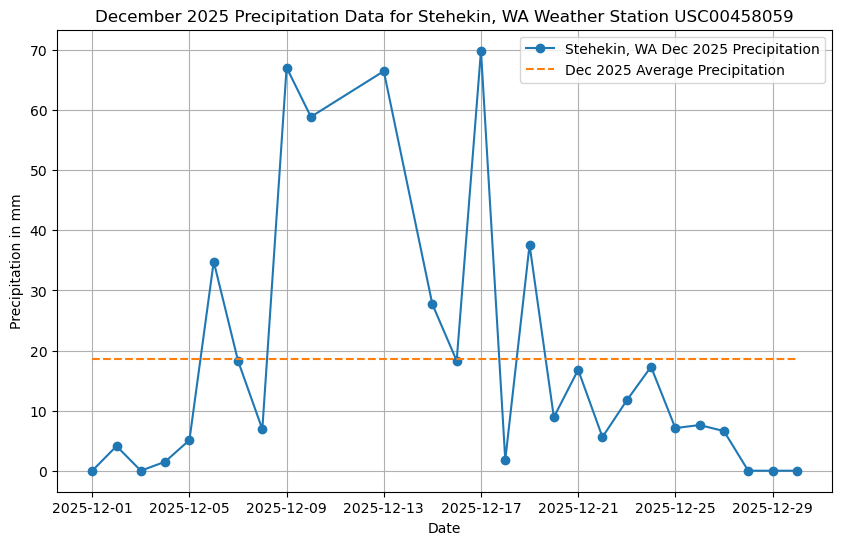

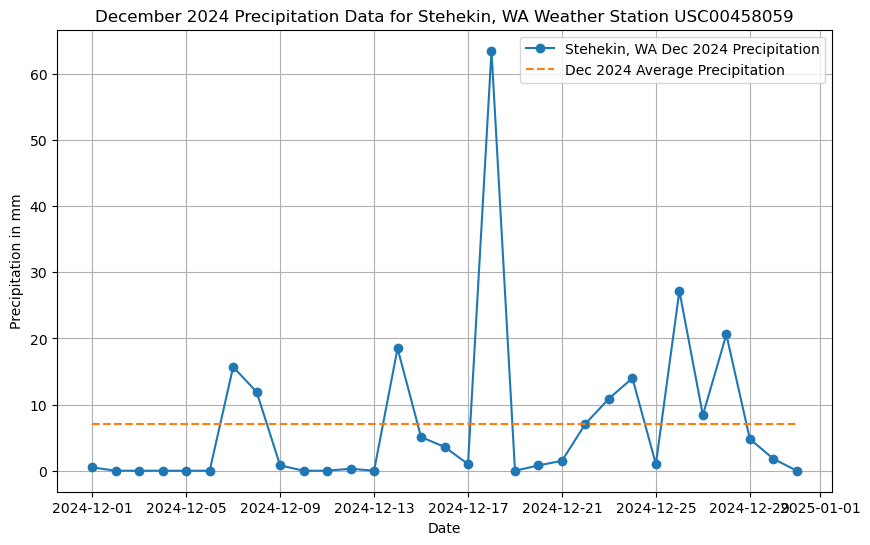

In [163]:
import numpy as np
plt.figure(figsize = (10,6))
#We convert 10ths of mm to mm
plt.plot(StePrcpDf['date'], StePrcpDf['value'], 'o', linestyle='-', label = "Stehekin, WA Dec 2025 Precipitation")
plt.plot(StePrcpDf['date'], np.ones((27,1))*StePrcpDf['value'].mean(), linestyle='--', label = "Dec 2025 Average Precipitation")
plt.grid()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Precipitation in mm")
plt.title("December 2025 Precipitation Data for Stehekin, WA Weather Station USC00458059")
plt.show()

plt.figure(figsize = (10,6))
#We convert 10ths of mm to mm
plt.plot(Ste24PrcpDf['date'], Ste24PrcpDf['value'], 'o', linestyle='-', label = "Stehekin, WA Dec 2024 Precipitation")
plt.plot(Ste24PrcpDf['date'], np.ones((31,1))*Ste24PrcpDf['value'].mean(), linestyle='--', label = "Dec 2024 Average Precipitation")
plt.grid()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Precipitation in mm")
plt.title("December 2024 Precipitation Data for Stehekin, WA Weather Station USC00458059")
plt.show()

## Monroe, WA Precipitation Data

In [ ]:
import numpy as np
plt.figure(figsize = (10,6))
#We convert 10ths of mm to mm
plt.plot(StePrcpDf['date'], StePrcpDf['value'], 'o', linestyle='-', label = "Stehekin, WA Dec 2025 Precipitation")
plt.plot(StePrcpDf['date'], np.ones((27,1))*StePrcpDf['value'].mean(), linestyle='--', label = "Dec 2025 Average Precipitation")
plt.grid()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Precipitation in mm")
plt.title("December 2025 Precipitation Data for Stehekin, WA Weather Station USC00458059")
plt.show()

plt.figure(figsize = (10,6))
#We convert 10ths of mm to mm
plt.plot(Ste24PrcpDf['date'], Ste24PrcpDf['value'], 'o', linestyle='-', label = "Stehekin, WA Dec 2024 Precipitation")
plt.plot(Ste24PrcpDf['date'], np.ones((31,1))*Ste24PrcpDf['value'].mean(), linestyle='--', label = "Dec 2024 Average Precipitation")
plt.grid()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Precipitation in mm")
plt.title("December 2024 Precipitation Data for Stehekin, WA Weather Station USC00458059")
plt.show()

{'metadata': {'resultset': {'offset': 1, 'count': 194, 'limit': 1000}},
 'results': [{'date': '2024-12-01T00:00:00',
   'datatype': 'PRCP',
   'station': 'GHCND:USC00455525',
   'attributes': ',,7,2000',
   'value': 0.0},
  {'date': '2024-12-01T00:00:00',
   'datatype': 'SNOW',
   'station': 'GHCND:USC00455525',
   'attributes': ',,7,',
   'value': 0.0},
  {'date': '2024-12-01T00:00:00',
   'datatype': 'SNWD',
   'station': 'GHCND:USC00455525',
   'attributes': ',,7,2000',
   'value': 0.0},
  {'date': '2024-12-01T00:00:00',
   'datatype': 'TMAX',
   'station': 'GHCND:USC00455525',
   'attributes': ',,7,2000',
   'value': 5.0},
  {'date': '2024-12-01T00:00:00',
   'datatype': 'TMIN',
   'station': 'GHCND:USC00455525',
   'attributes': ',,7,2000',
   'value': -0.6},
  {'date': '2024-12-01T00:00:00',
   'datatype': 'TOBS',
   'station': 'GHCND:USC00455525',
   'attributes': ',,7,2000',
   'value': 1.7},
  {'date': '2024-12-01T00:00:00',
   'datatype': 'WT01',
   'station': 'GHCND:USC00455

## Monroe, WA Precipitation Data

In [ ]:
#Define the API URL and token header
headers = {'token' : 'TvAdxJblLeoezyJUbgSJRikNMntqSusm'}
url = 'https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND:USC00455525&&units=metric&datatype=PRCP&limit=1000&startdate=2025-12-01&enddate=2025-12-31'
# Download the json data
response = requests.get(url, headers=headers)
response.raise_for_status()  # Raise an error if the request failed
MonroeWeatherData2025 = response.json() #get json file

url = 'https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND:USC00455525&&units=metric&datatype=PRCP&limit=1000&startdate=2024-12-01&enddate=2024-12-31'
# Download the json data
response = requests.get(url, headers=headers)
response.raise_for_status()  # Raise an error if the request failed

MonroeWeatherData2024 = response.json() #get json file
# Check data imported correctly
MonroeWeatherData2024

/tmp/ipykernel_70/2533695144.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mon25PrcpDf["date"] = pd.to_datetime(Mon25PrcpDf["date"])
/tmp/ipykernel_70/2533695144.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mon24PrcpDf["date"] = pd.to_datetime(Mon24PrcpDf["date"])


In [ ]:
# Convert json to pd dataframe
Mon25Df = pd.DataFrame(MonroeWeatherData2025["results"])

# Collect only precipitation data
Mon25PrcpDf = Mon25Df[Mon25Df["datatype"]=="PRCP"] 

# Convert dates to nice format
Mon25PrcpDf["date"] = pd.to_datetime(Mon25PrcpDf["date"])

# Convert json to pd dataframe
Mon24Df = pd.DataFrame(MonroeWeatherData2024["results"])

# Collect only precipitation data
Mon24PrcpDf = Mon24Df[Mon24Df["datatype"]=="PRCP"] 

# Convert dates to nice format
Mon24PrcpDf["date"] = pd.to_datetime(Mon24PrcpDf["date"])


In [13]:
import numpy as np

plt.figure(figsize = (10,6))
plt.plot(Mon25PrcpDf['date'], Mon25PrcpDf['value'], 'o', linestyle='-', label = "Monroe, WA Dec 2025 Precipitation")
plt.plot(Mon25PrcpDf['date'], np.ones((30,1))*Mon25PrcpDf['value'].mean(), linestyle='--', label = "Dec 2025 Average Precipitation")
plt.grid()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Precipitation in mm")
plt.title("December 2025 Precipitation Data for Monroe, WA Weather Station USC00455525")
plt.show()

plt.figure(figsize = (10,6))
plt.plot(Mon24PrcpDf['date'], Mon24PrcpDf['value'],'o', linestyle='-', label = "Monroe, WA Dec 2024 Precipitation")
plt.plot(Mon24PrcpDf['date'], np.ones((31,1))*Mon24PrcpDf['value'].mean(), linestyle='--', label = "Dec 2024 Average Precipitation")
plt.grid()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Precipitation in mm")
plt.title("December 2024 Precipitation Data for Monroe, WA Weather Station USC00455525")
plt.show()



NameError: name 'Mon25PrcpDf' is not defined

<Figure size 1000x600 with 0 Axes>